# Project: XGBoost Classifier — Synthetic Fraud Detection
**Objective:** Build a machine learning model using XGBoost Classifier to detect fraudulent credit card transactions based on transaction and user behavior data.

**Business goal:** Maximise correct detection of fraud (high recall for fraud) while keeping false positives manageable.  
**Project flow:**
1. Importing libraries
2. Dataset
3. Exploratory Data Analysis (EDA)  
4. Preprocessing (scaling, imbalance handling)  
5. Baseline XGBoost training  
6. Hyperparameter tuning  
7. Final evaluation & explainability (SHAP)  
8. Save model and document results

###Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

###Uploading and loading dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving StressLevelDataset.csv to StressLevelDataset (1).csv


In [3]:
df = pd.read_csv("StressLevelDataset.csv")

###EDA

In [4]:
df.shape


(1100, 21)

In [5]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [8]:
# Checking for null values
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [9]:
#Duplicate value checking
df.duplicated().sum()

np.int64(0)

####Checking for Outliers

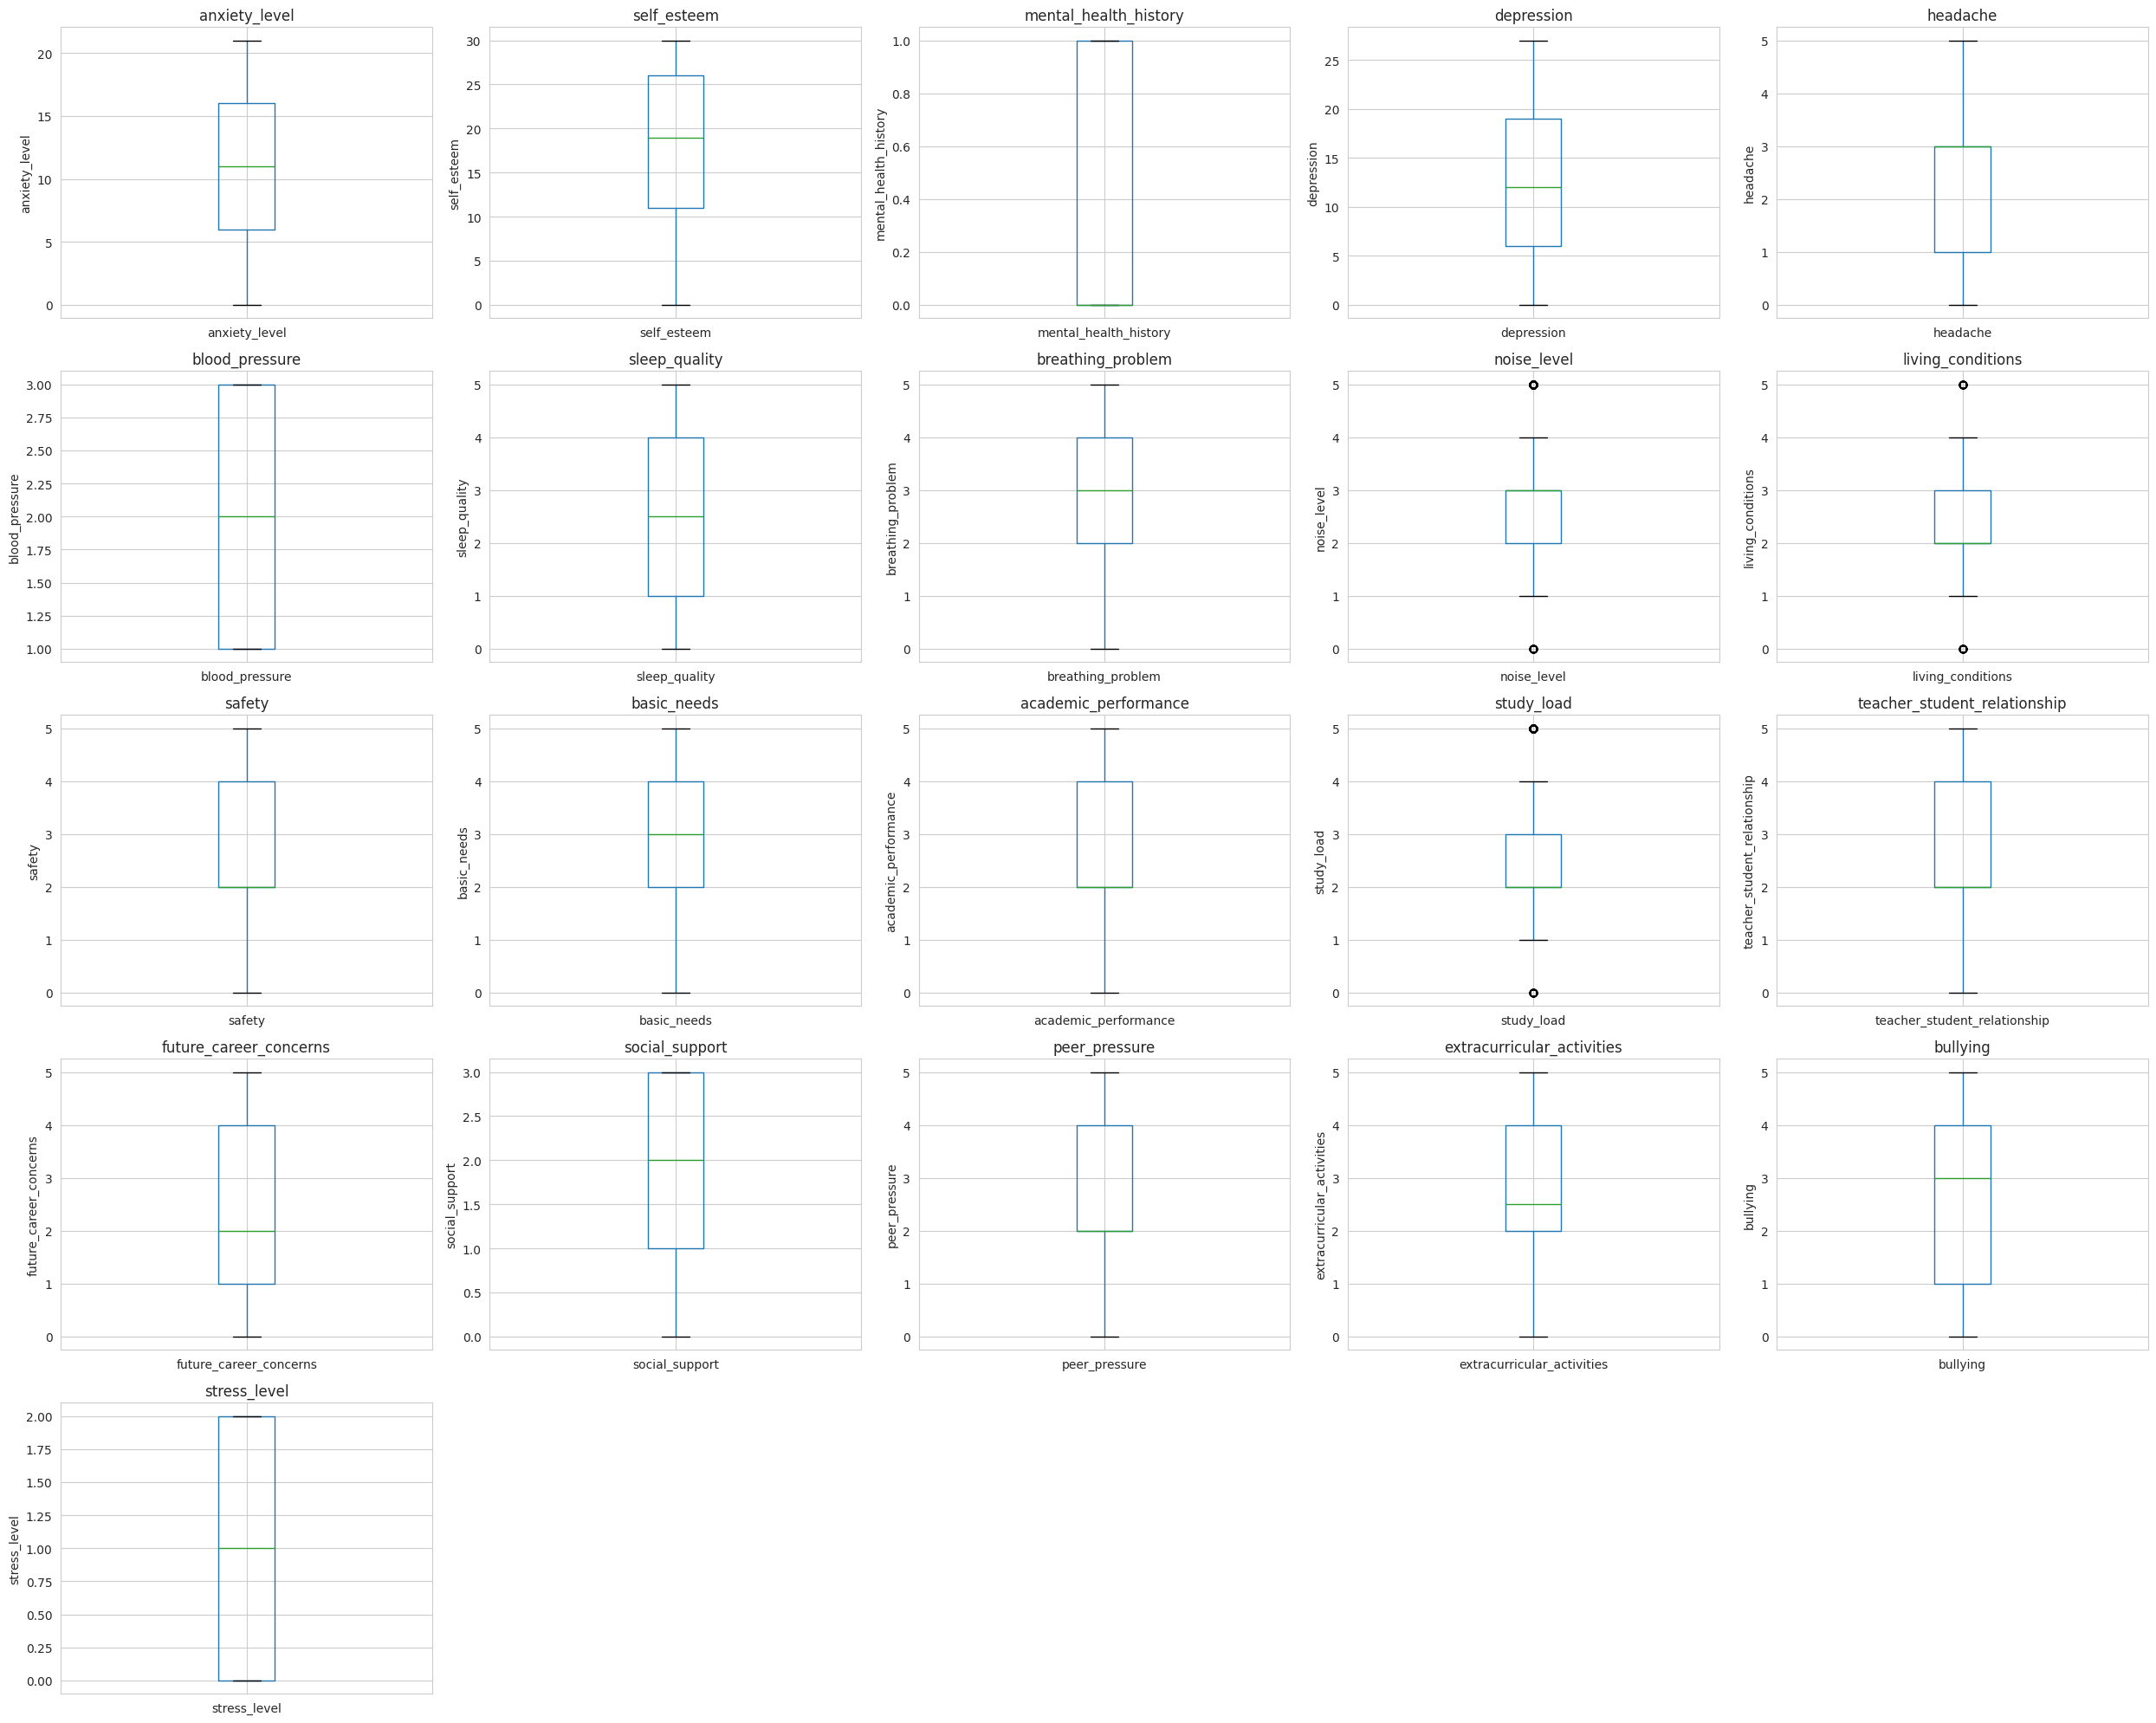

In [10]:
#Checking For Outliers
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [11]:
#Removing Outliers
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

for i in num_cols:
    lower,upper=remove_outlier(df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

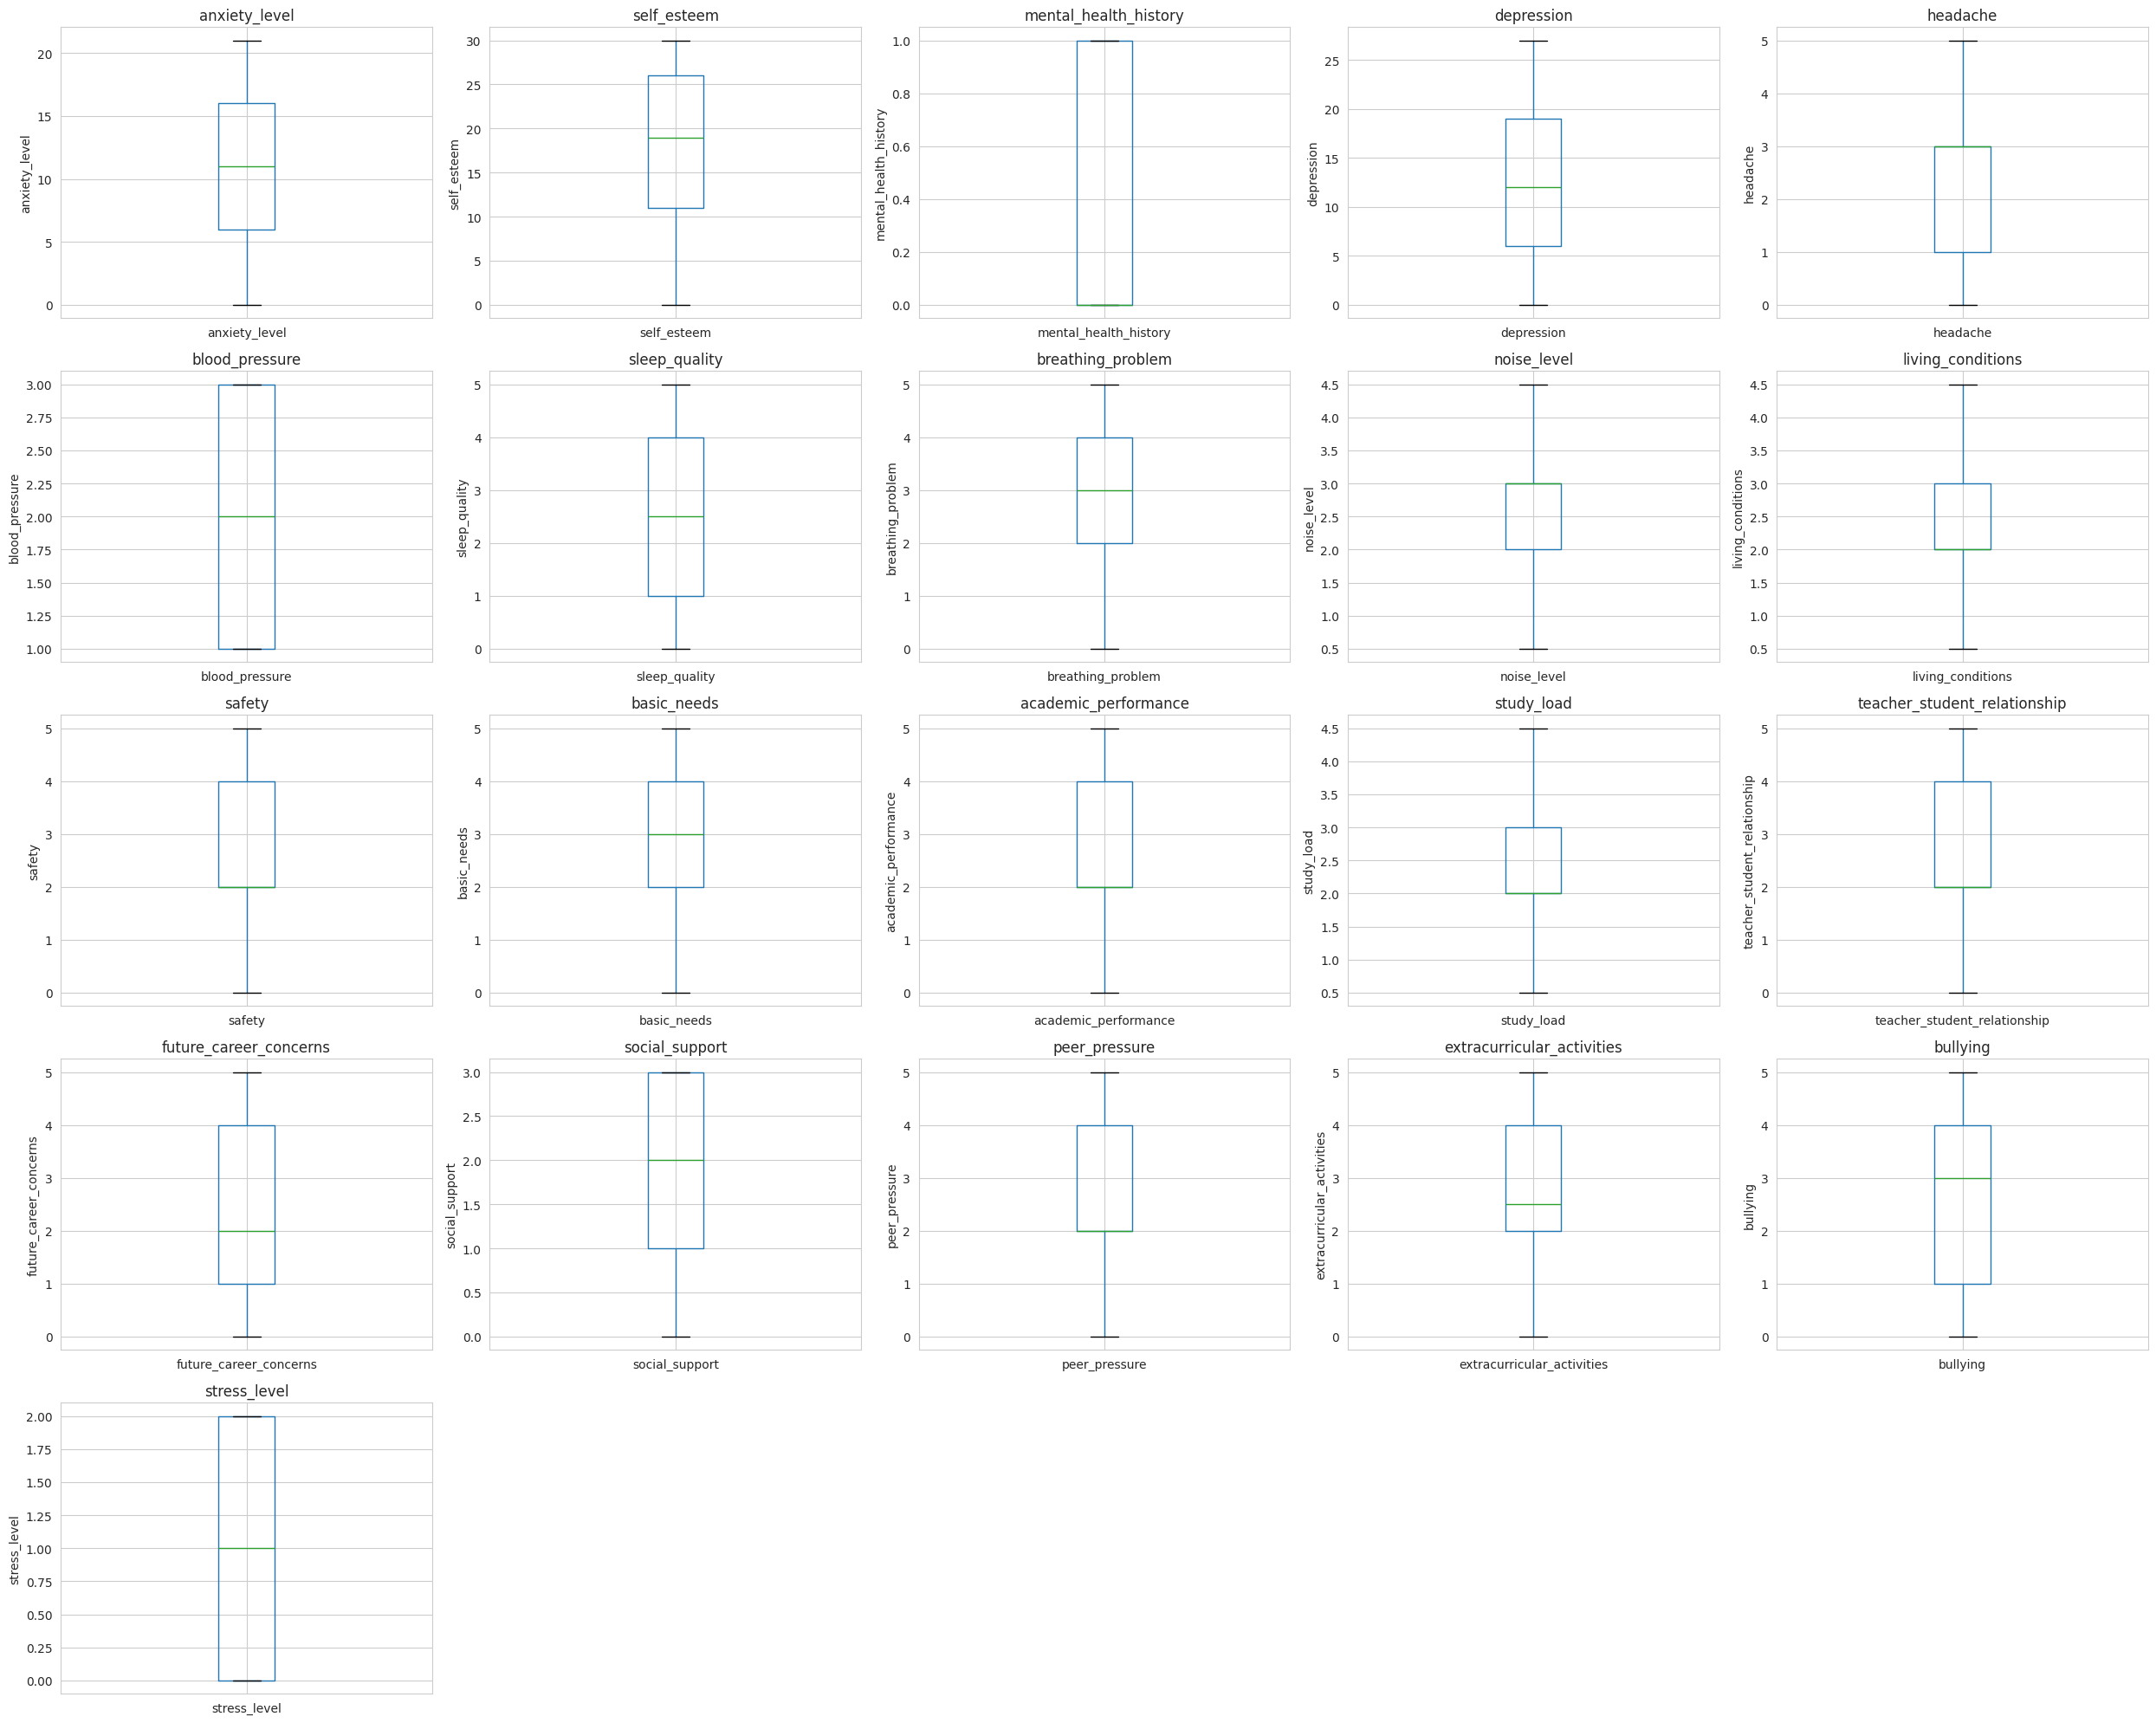

In [12]:
#Checking For Outliers After Treatment
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Therefore all outliers removed.

####Correlation Heatmap

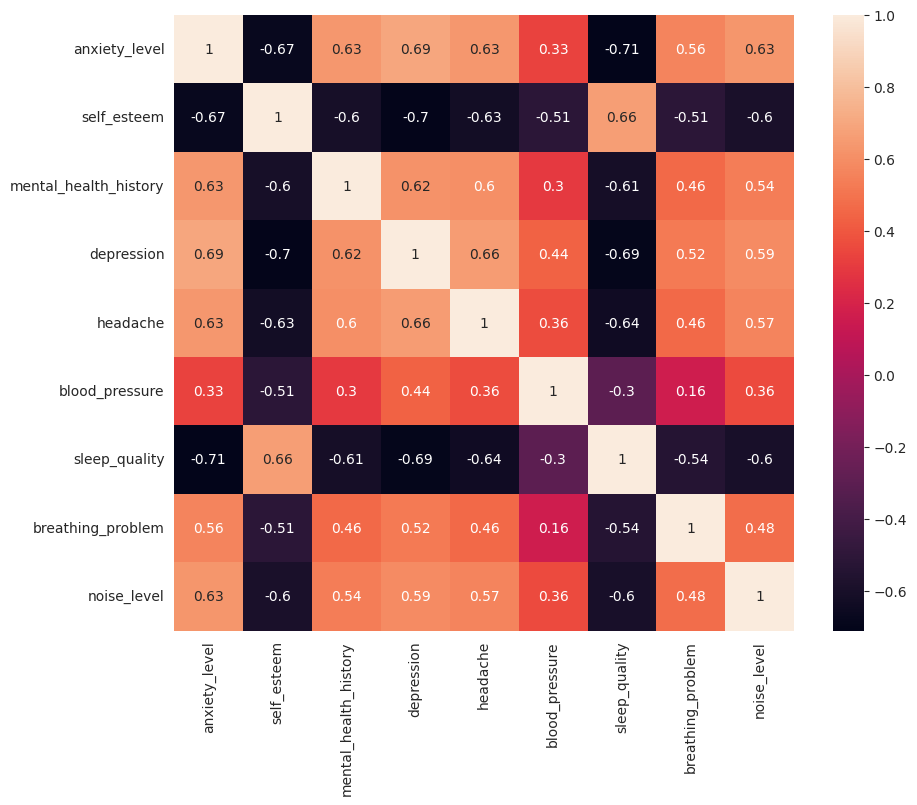

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)
plt.show()

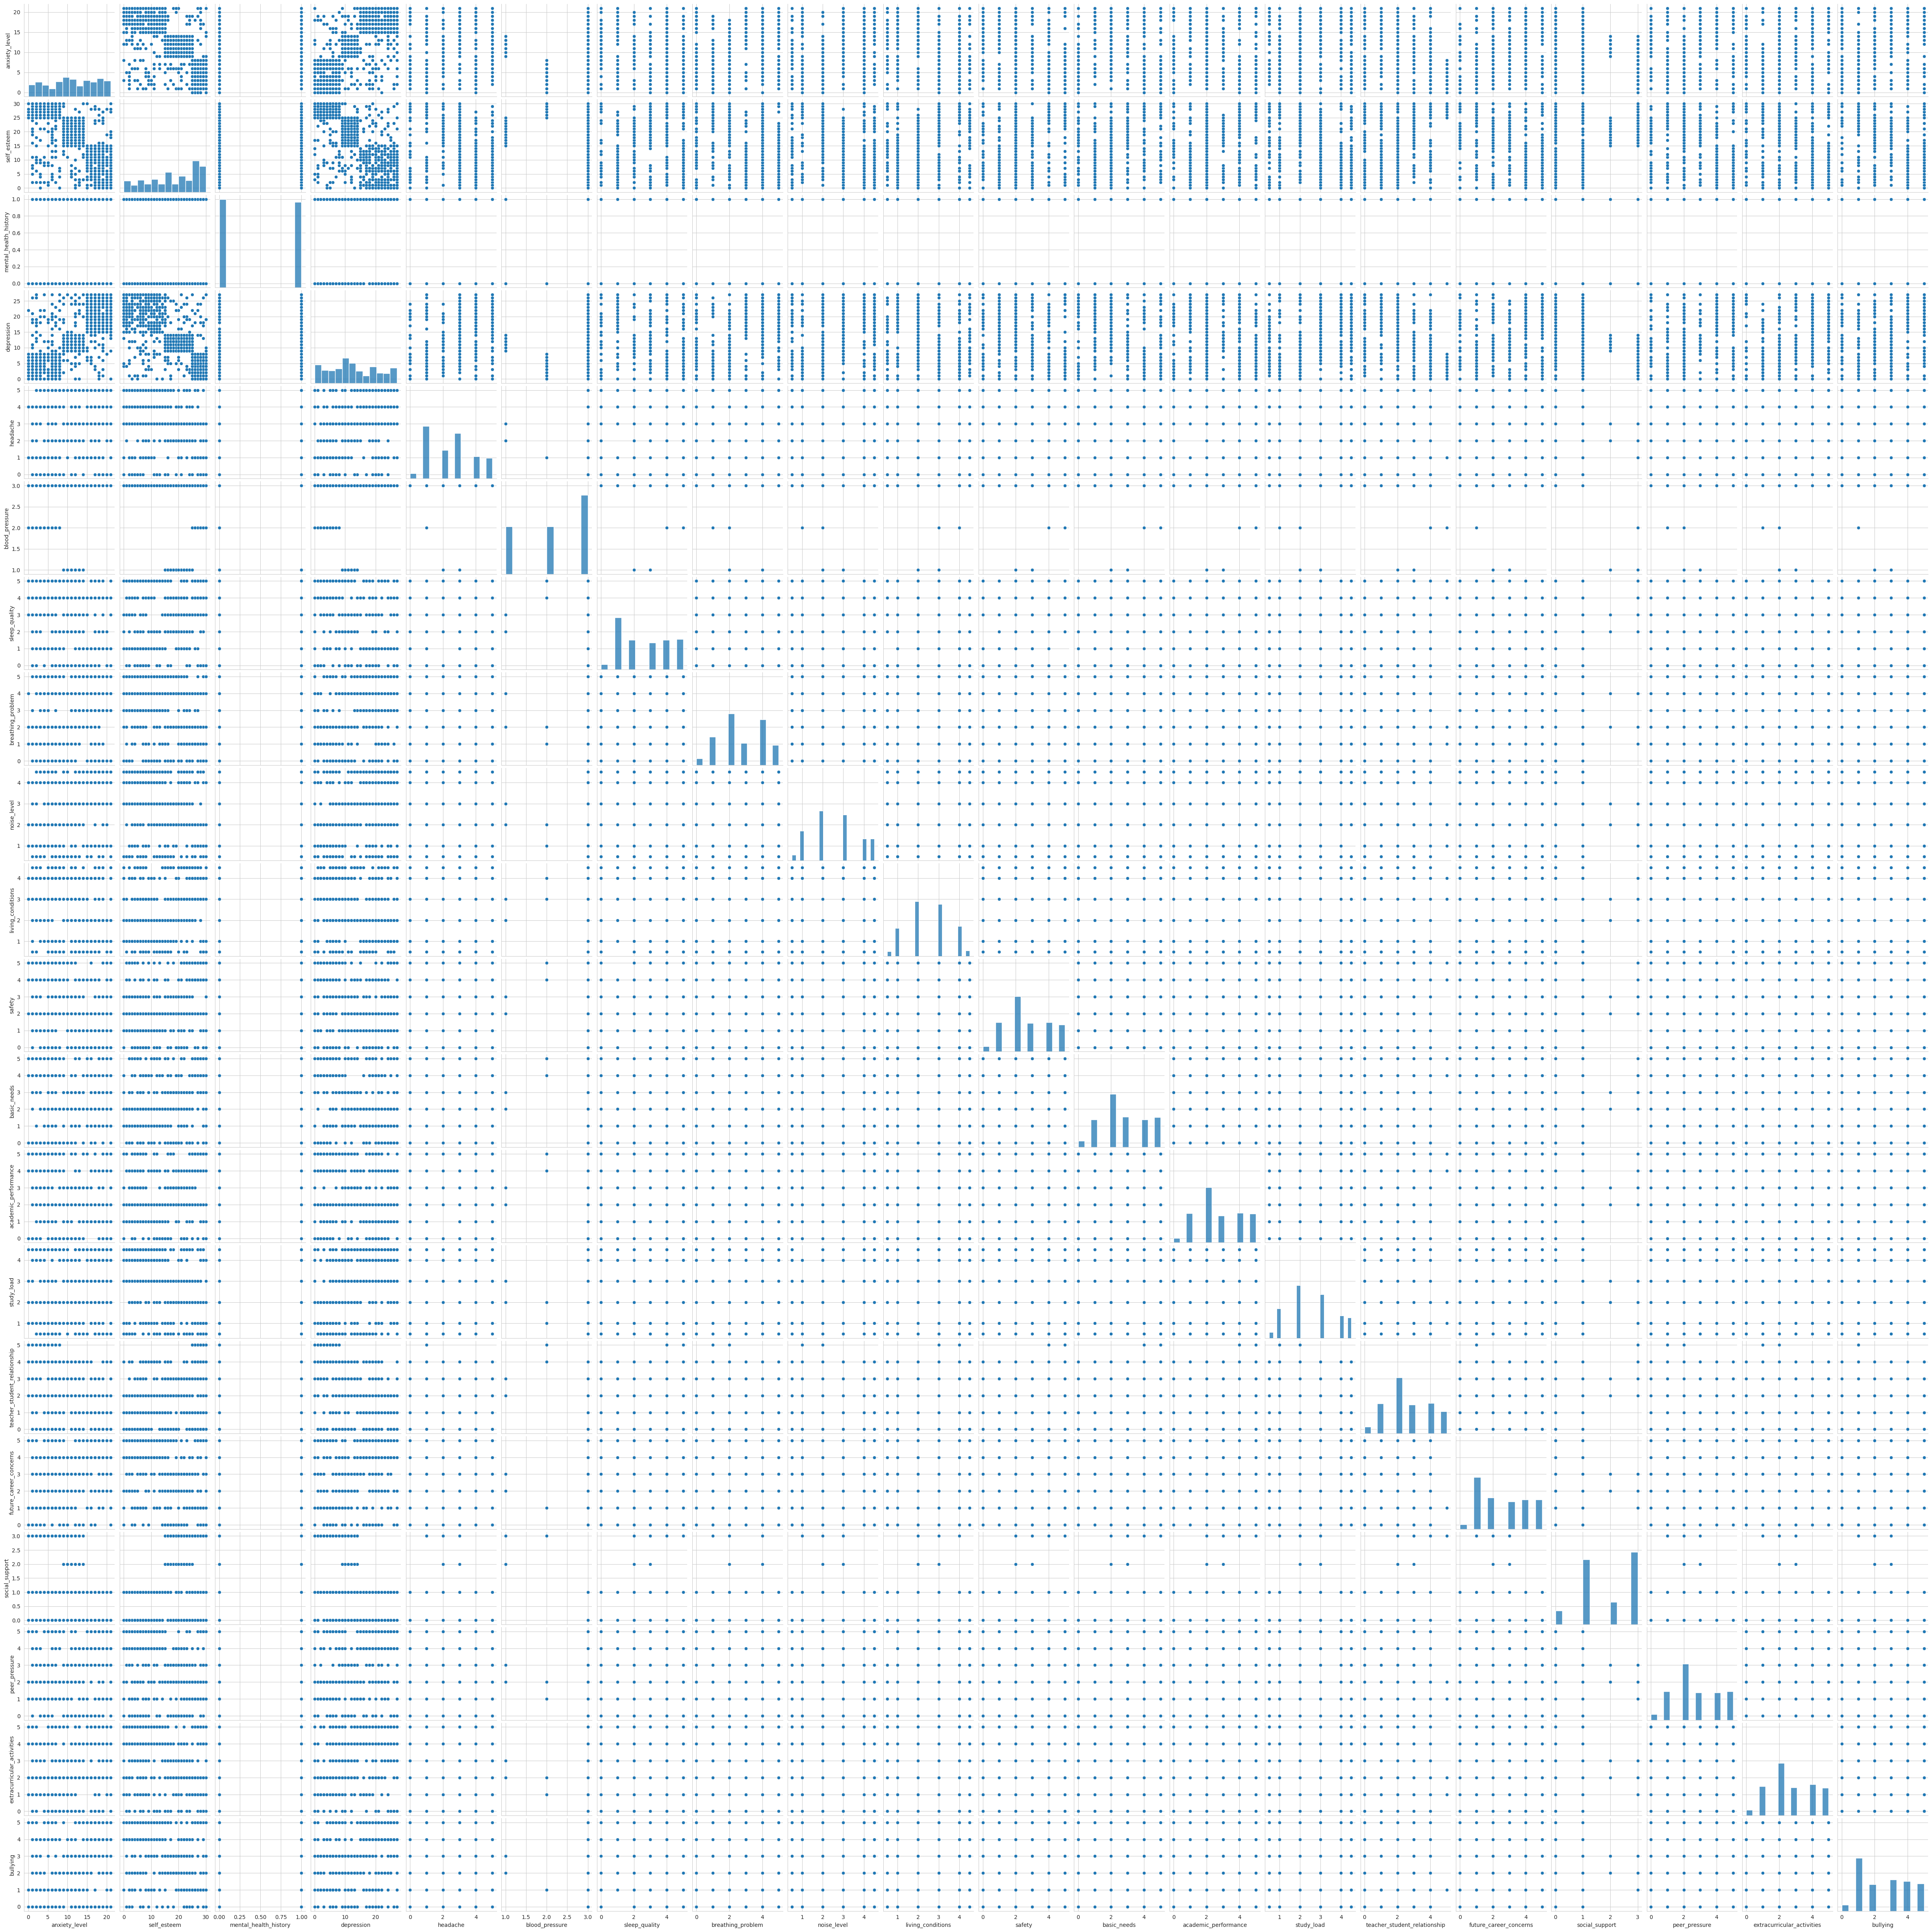

In [15]:
df_attr=(df.drop(['stress_level'],axis=1))
sns.pairplot(df_attr)
plt.show()

###Data Preprocessing

Test Train Split

In [44]:
df['stress_level'] = df['stress_level'].replace({
    0: 0,
    1: 1,
    2: 1
})

In [45]:
# Split Data into Input (X) and Target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Since no categorical values so no encoding

###Model Training and Evaluation

First we train on a basic Random Forest Classifier model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_model = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

In [49]:
# Model Training
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [50]:
# Predictions
y_pred = rf_model.predict(X_test)

✅ Training Accuracy: 100.0 %
✅ Testing Accuracy: 90.91 %

📊 Classification Report:
               precision    recall  f1-score   support

Not Stressed       0.97      0.76      0.85        75
    Stressed       0.89      0.99      0.93       145

    accuracy                           0.91       220
   macro avg       0.93      0.87      0.89       220
weighted avg       0.91      0.91      0.91       220



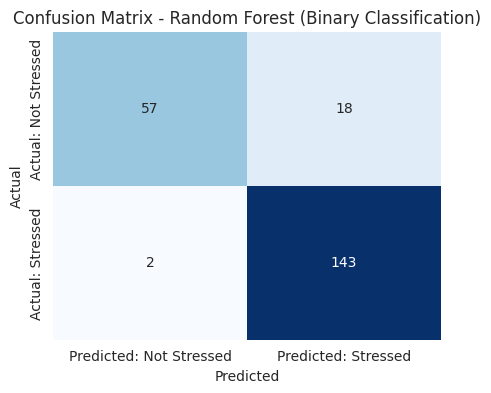

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("✅ Training Accuracy:", round(train_accuracy * 100, 2), "%")
print("✅ Testing Accuracy:", round(test_accuracy * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Stressed', 'Stressed']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Not Stressed', 'Predicted: Stressed'],
            yticklabels=['Actual: Not Stressed', 'Actual: Stressed'])
plt.title('Confusion Matrix - Random Forest (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###HyperParametric Tuning using RandomizedSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
✅ Best Cross-Validation Accuracy: 93.41 %

🎯 Train Accuracy with Tuned Model: 100.0 %
🎯 Test Accuracy with Tuned Model: 92.27 %

Classification Report (Tuned Model):
               precision    recall  f1-score   support

         0.0       0.97      0.80      0.88        75
         1.0       0.91      0.99      0.94       145

    accuracy                           0.92       220
   macro avg       0.94      0.89      0.91       220
weighted avg       0.93      0.92      0.92       220



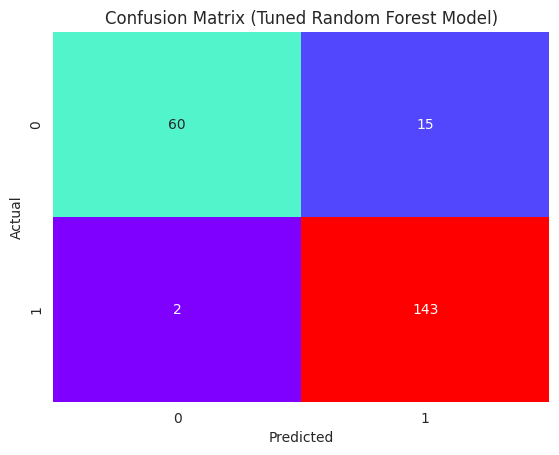

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("✅ Best Parameters:", random_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", round(random_search.best_score_ * 100, 2), "%")

best_rf = random_search.best_estimator_
# Evaluate on train and test data
ytrain_predict_tuned = best_rf.predict(X_train)
ytest_predict_tuned = best_rf.predict(X_test)

print("\n🎯 Train Accuracy with Tuned Model:", round(accuracy_score(y_train, ytrain_predict_tuned) * 100, 2), "%")
print("🎯 Test Accuracy with Tuned Model:", round(accuracy_score(y_test, ytest_predict_tuned) * 100, 2), "%")

print("\nClassification Report (Tuned Model):\n", classification_report(y_test, ytest_predict_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, ytest_predict_tuned), annot=True, fmt='g', cbar=False, cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest Model)')
plt.show()


RandomizedSearchCV tuning improved model’s overall test performance accuracy from 90.91% → 92.27% and slightly improved precision/recall balance, leading to a more robust and accurate Random Forest model.

##XGBoost Model

In [61]:
from xgboost import XGBClassifier
#Initialize model
xgb_model = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.1,       # step size shrinkage
    max_depth=6,             # tree depth
    subsample=0.8,           # fraction of samples for fitting
    colsample_bytree=0.8,    # fraction of features per tree
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)


In [62]:
#train and predict
# Train
xgb_model.fit(X_train, y_train)

# Predictions
ytrain_pred = xgb_model.predict(X_train)
ytest_pred = xgb_model.predict(X_test)


✅ Training Accuracy: 100.0 %
✅ Testing Accuracy: 90.91 %

📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86        75
         1.0       0.90      0.97      0.93       145

    accuracy                           0.91       220
   macro avg       0.91      0.88      0.90       220
weighted avg       0.91      0.91      0.91       220



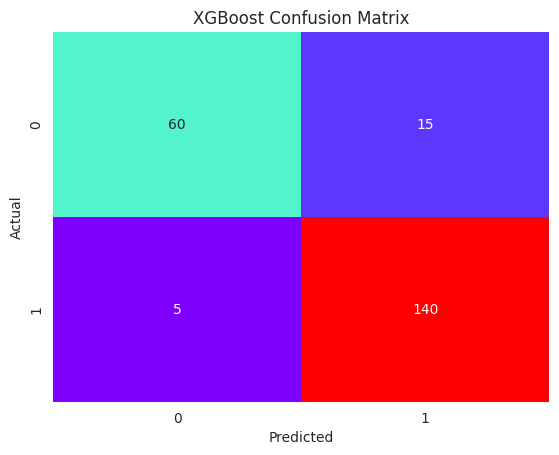

In [63]:
print("✅ Training Accuracy:", round(accuracy_score(y_train, ytrain_pred) * 100, 2), "%")
print("✅ Testing Accuracy:", round(accuracy_score(y_test, ytest_pred) * 100, 2), "%")

print("\n📊 Classification Report:")
print(classification_report(y_test, ytest_pred))

sns.heatmap(confusion_matrix(y_test, ytest_pred), annot=True, fmt='g', cmap='rainbow', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


###Hyperparameter Tuning using RandomizedSearchCV

Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Best Parameters Found: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}
✅ Best Cross-Validation Accuracy: 93.98 %

🎯 Train Accuracy (Tuned): 95.23 %
🎯 Test Accuracy (Tuned): 91.36 %

📊 Classification Report (Tuned XGBoost):
               precision    recall  f1-score   support

         0.0       0.98      0.76      0.86        75
         1.0       0.89      0.99      0.94       145

    accuracy                           0.91       220
   macro avg       0.94      0.88      0.90       220
weighted avg       0.92      0.91      0.91       220



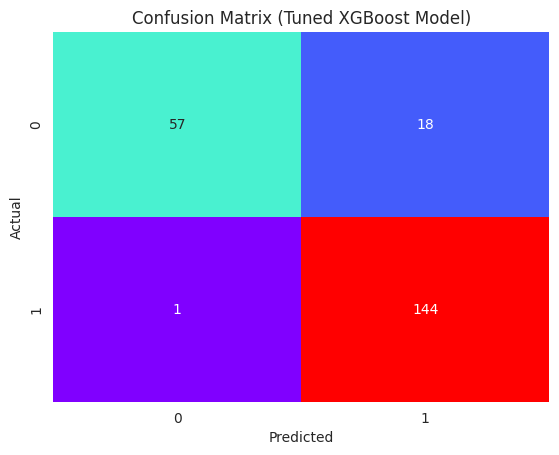

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distribution for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.5]
}

# Base model
xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=25,          # Try 25 random combinations
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit
random_search_xgb.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters Found:", random_search_xgb.best_params_)
print("✅ Best Cross-Validation Accuracy:", round(random_search_xgb.best_score_ * 100, 2), "%")

# Evaluate tuned model
best_xgb = random_search_xgb.best_estimator_
ytrain_pred_tuned = best_xgb.predict(X_train)
ytest_pred_tuned = best_xgb.predict(X_test)

print("\n🎯 Train Accuracy (Tuned):", round(accuracy_score(y_train, ytrain_pred_tuned) * 100, 2), "%")
print("🎯 Test Accuracy (Tuned):", round(accuracy_score(y_test, ytest_pred_tuned) * 100, 2), "%")

print("\n📊 Classification Report (Tuned XGBoost):\n", classification_report(y_test, ytest_pred_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, ytest_pred_tuned), annot=True, fmt='g', cmap='rainbow', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned XGBoost Model)")
plt.show()


##Comparision Between Tuned Random Forest and XGBoost Model

In [65]:
import pandas as pd

# Model Comparison Data
comparison_data = {
    "Model": [
        "Random Forest (Untuned)",
        "Random Forest (Tuned)",
        "XGBoost (Untuned)",
        "XGBoost (Tuned)"
    ],
    "Train Accuracy (%)": [100.00, 96.70, 100.00, 95.23],
    "Test Accuracy (%)": [90.91, 92.27, 90.91, 91.36],
    "Cross-Validation Accuracy (%)": ["-", 93.18, "-", 93.98],
    "Remarks": [
        "Slight overfitting; strong recall for fraud cases",
        "Better generalization, improved balance",
        "Excellent baseline; some overfitting visible",
        "Reduced overfitting; strong fraud detection performance"
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display neatly
print("🔍 Model Performance Comparison:\n")
display(comparison_df.style.set_properties(**{
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'color': 'black',
    'font-size': '14px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#d3d3d3')]
}]))


🔍 Model Performance Comparison:



,Model,Train Accuracy (%),Test Accuracy (%),Cross-Validation Accuracy (%),Remarks
0,Random Forest (Untuned),100.000000,90.910000,-,Slight overfitting; strong recall for fraud cases
1,Random Forest (Tuned),96.700000,92.270000,93.180000,"Better generalization, improved balance"
2,XGBoost (Untuned),100.000000,90.910000,-,Excellent baseline; some overfitting visible
3,XGBoost (Tuned),95.230000,91.360000,93.980000,Reduced overfitting; strong fraud detection performance


##**Conclusion:**

Both tuned models performed better than their untuned versions.
Random Forest (Tuned) achieved the highest test accuracy (92.27%)
and showed excellent balance between bias and variance.
XGBoost (Tuned) also performed competitively with 91.36% accuracy.